# Processor temperature

We have a temperature sensor in the processor of our company's server. We want to analyze the data provided to determinate whether we should change the cooling system for a better one. It is expensive and as a data analyst we cannot make decisions without a basis.

We provide the temperatures measured throughout the 24 hours of a day in a list-type data structure composed of 24 integers:
```
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
```

## Goals

1. Treatment of lists
2. Use of loop or list comprenhention
3. Calculation of the mean, minimum and maximum.
4. Filtering of lists.
5. Interpolate an outlier.
6. Logical operators.
7. Print

## Temperature graph
To facilitate understanding, the temperature graph is shown below. You do not have to do anything in this section. The test starts in **Problem**.

Text(0.5, 1.0, 'Temperatures of our server throughout the day')

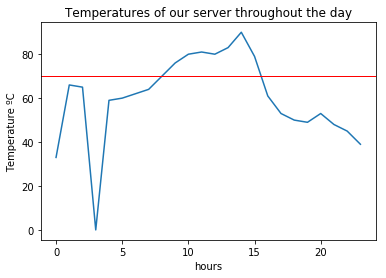

In [1]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# plot
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

## Problem

If the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature above 80ºC or the average exceeds 65ºC throughout the day, we must give the order to change the cooling system to avoid damaging the processor.

We will guide you step by step so you can make the decision by calculating some intermediate steps:

1. Minimum temperature
2. Maximum temperature
3. Temperatures equal to or greater than 70ºC
4. Average temperatures throughout the day.
5. If there was a sensor failure at 03:00 and we did not capture the data, how would you estimate the value that we lack? Correct that value in the list of temperatures.
6. Bonus: Our maintenance staff is from the United States and does not understand the international metric system. Pass temperatures to Degrees Fahrenheit.

Formula: F = 1.8 * C + 32

web: https://en.wikipedia.org/wiki/Conversion_of_units_of_temperature


In [3]:
# assign a variable to the list of temperatures
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))


# 1. Calculate the minimum of the list and print the value using print()
minimum = min(y)
print("La température minimale est", minimum, "°C")


# 2. Calculate the maximum of the list and print the value using print()
maximum = max(y)
print("La température maximale est", maximum, "°C")


# 3. Items in the list that are greater than 70ºC and print the result
soixantedix = []

for i in range(len(y)):
    temp = int(y[i])
    if y[i]>=70:
        soixantedix.append(temp)

print("\nLes températures égales ou exédant 70°C sont :\n", set(soixantedix))

# 4. Calculate the mean temperature throughout the day and print the result
somme = 0

for i in range(len(y)):
    somme += y[i]

moyenne_1 = somme/len(y)

print("\nLa température moyenne dans la journée est : ", moyenne_1, "°C (version boucle) ")

moyenne_2 = sum(y)/len(y)

print("La température moyenne dans la journée est : ", moyenne_2, "°C (version formule) ")

# 5.1 Solve the fault in the sensor by estimating a value
# Température à 2h : 65
# Température à 4h : 59
if y[2] > y[4]:
    temp_3am = int(y[2])-(y[2]-y[4])/2
else:
    temp_3am = int(y[2])+(y[2]-y[4])/2

print("\nEstimation de la température à 3h : ", temp_3am)

# 5.2 Update of the estimated value at 03:00 on the list
y[3]= temp_3am

print("Température à 3h : ", y[3])


# Bonus: convert the list of ºC to ºFarenheit
# F = 1.8 * C + 32

farenheit = []

for i in x:
    far = 1.8 * int(y[i]) + 32
    farenheit.append(round(far, 2))
    
print("Températures en farenheit : \n", farenheit)


La température minimale est 0 °C
La température maximale est 90 °C

Les températures égales ou exédant 70°C sont :
 {70, 76, 79, 80, 81, 83, 90}

La température moyenne dans la journée est :  60.25 °C (version boucle) 
La température moyenne dans la journée est :  60.25 °C (version formule) 

Estimation de la température à 3h :  62.0
Température à 3h :  62.0
Températures en farenheit : 
 [91.4, 150.8, 149.0, 143.6, 138.2, 140.0, 143.6, 147.2, 158.0, 168.8, 176.0, 177.8, 176.0, 181.4, 194.0, 174.2, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]


## Take the decision
Remember that if the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature higher than 80ºC or the average was higher than 65ºC throughout the day, we must give the order to change the cooling system to avoid the danger of damaging the equipment:
* more than 4 hours with temperatures greater than or equal to 70ºC
* some temperature higher than 80ºC
* average was higher than 65ºC throughout the day
If any of these three is met, the cooling system must be changed.


In [4]:
# Print True or False depending on whether you would change the cooling system or not

trash = False

if len(soixantedix)>4:
    trash = True
elif moyenne_1>65:
    trash = True
else:
    for i in x:
        if y[i]>80:
            trash = True

print("We have to change the cooling system :")
print(trash)

We have to change the cooling system :
True


## Future improvements
1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
3. Average of each of the lists (ºC and ºF). How they relate?
4. Standard deviation of each of the lists. How they relate?


In [53]:
# 1. We want the hours (not the temperatures) whose temperature exceeds 70ºC

soixantedix_heures = []

for i in range(len(y)):
    if y[i]>=70:
        soixantedix_heures.append(i)

print("The hours whose temperature exceeds 70°C are :\n", soixantedix_heures)



The hours whose temperature exceeds 70°C are :
 [8, 9, 10, 11, 12, 13, 14, 15]


In [55]:
# 2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?

compteur = 0
consec = False

print("Compteur : ", compteur)
print()

for i in range(len(soixantedix_heures)):
    if i<len(soixantedix_heures)-1:
        print(soixantedix_heures[i])
        print(soixantedix_heures[i+1])
        if soixantedix_heures[i]==(soixantedix_heures[i+1]-1):
            compteur += 1
            print("État du compteur : ", compteur, "\n")
        else:
            compteur = 0
            print("État du compteur : ", compteur, "\n")

if compteur>=4:
    consec = True
    
print(compteur)
print("Il y a plus de 4 heures consécutives : ", consec)


Compteur :  0

8
9
État du compteur :  1 

9
10
État du compteur :  2 

10
11
État du compteur :  3 

11
12
État du compteur :  4 

12
13
État du compteur :  5 

13
14
État du compteur :  6 

14
15
État du compteur :  7 

7
Il y a plus de 4 heures consécutives :  True


In [68]:
# 3. Average of each of the lists (ºC and ºF). How they relate?

moyenne_celcius = sum(y)/len(y)
moyenne_farenheit = sum(farenheit)/len(farenheit)


print("Moyenne des températures en degrés celcius : ", round(moyenne_celcius, 2), "°C")
print("Moyenne des températures en degrés farenheit : ", round(moyenne_farenheit, 2), "°F")

# Tests de conversion
# F = 1.8 * C + 32

test_farenheit = round(1.8*moyenne_celcius+32, 2)

print("\nMoyenne celcius convertie en farenheit : ", test_farenheit)

if test_farenheit == moyenne_farenheit:
    print("\nThe average in celcius is the same in farenheit")



Moyenne des températures en degrés celcius :  62.83 °C
Moyenne des températures en degrés farenheit :  145.1 °F

Moyenne celcius convertie en farenheit :  145.1

The average in celcius is the same in farenheit


In [95]:
# 4. Standard deviation of each of the lists. How they relate?

"""
pstdev(y)
pstdev(farenheit)
"""

# CELCIUS

variance_celcius = 0
somme_celcius = 0

for i in range(len(y)):
    somme_celcius += (i-moyenne_celcius)**2

variance_celcius = somme_celcius/len(y)

standard_deviation_celcius = variance_celcius**0.5

print("The standard deviation in celcius is", standard_deviation_celcius)

# FARENHEIT

variance_farenheit = 0
somme_farenheit = 0

for i in range(len(farenheit)):
    somme_farenheit +=(i-moyenne_farenheit)**2

variance_farenheit = somme_farenheit/len(farenheit)

standard_deviation_farenheit = variance_farenheit**0.5

print("The standard deviation in farenheit is", standard_deviation_farenheit)


# RELATE

test_celcius = (standard_deviation_farenheit/1.8)-32
test_farenheit = 1.8*standard_deviation_celcius+32

print("\nÉcart-type farenheit converti en celcius : ", test_celcius)
print("Écart-type celcius converti en farenheit : ", test_farenheit)

print("\nLes valeurs des écart-types obtenues par convertion sont proches de celles obtenues par calcul")

The standard deviation in celcius is 51.797951482445505
The standard deviation in farenheit is 133.77920864867852

Écart-type farenheit converti en celcius :  42.32178258259917
Écart-type celcius converti en farenheit :  125.23631266840191

Les valeurs des écart-types obtenues par convertion sont proches de celles obtenues par calcul
